# 1 Corner Detection

The second moment matrix:
$$
\mathbf{M}=
\begin{bmatrix}
\sum_{(x,y)\in w}w(x,y)I_x^2(x,y) & \sum_{(x,y)\in w}w(x,y)I_x(x,y)I_y(x,y) \\
\sum_{(x,y)\in w}w(x,y)I_x(x,y)I_y(x,y) & \sum_{(x,y)\in w}w(x,y)I_y^2(x,y)
\end{bmatrix}
$$

$$
E(u,v)=
\begin{bmatrix}
u & v \\
\end{bmatrix}
\mathbf{M}
\begin{bmatrix}
u\\
v
\end{bmatrix}
$$

Compute the second moment matrix:

1. Compute image gradients $I_x$, $I_y$
2. Compute gradients $I_x^2$, $I_y^2$, $I_xI_y$
3. Convolve with window function
4. Assemble second moment matrix at each pixel

Corner Detection:

1. Compute the gradient at each point in the image
2. Create the M matrix from the entries in the gradient
3. Compute the eigenvalues
4. Find points with large response (λmin > threshold)
5. Choose those points where λmin is a local maximum as features

In [65]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import importlib
import copy
import sys 
sys.path.append("..")

# reload module in case that module changes
from lib import utils
importlib.reload(utils)
from lib import image_process
importlib.reload(image_process)

<module 'lib.image_process' from '..\\lib\\image_process.py'>

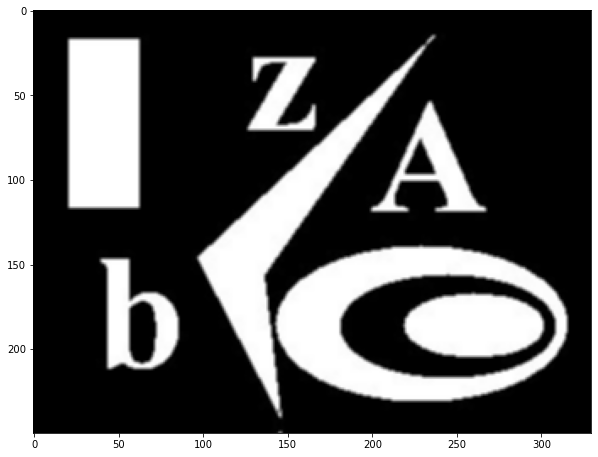

In [66]:
img = cv2.imread('img/example_02.jpg', cv2.IMREAD_GRAYSCALE)
img = image_process.separable_gaussian_filter(image_process.boundary_process(img, 6, 'same', 'reflect'), 1, 1)
plt.figure(figsize=(10,10))
utils.show_img(img)

In [36]:
smm_map = image_process.compute_second_moment_matrix(img, 1, 1)

In [37]:
height = img.shape[0]
width = img.shape[1]
min_eigenvalue_matrix = np.zeros((height, width))
for m in range(0, height):
    for n in range(0, width):
        min_eigenvalue_matrix[m][n] = max(np.linalg.eigvals(smm_map[m][n]).min(),0)

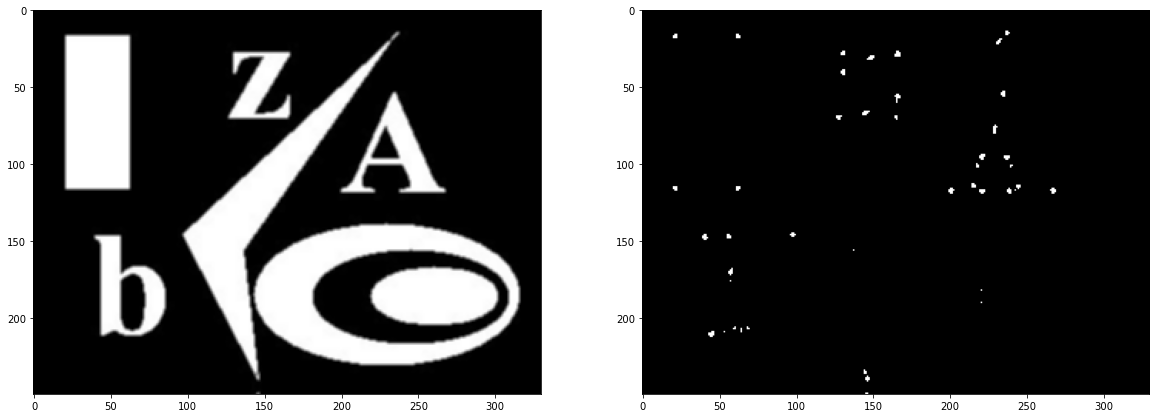

In [95]:
plt.figure(figsize=(20,10))
plt.subplot(121)
utils.show_img(img)
plt.subplot(122)
utils.show_img(image_process.thresholding_filter(min_eigenvalue_matrix, 17000))

Text(0.5, 1.0, 'Corners')

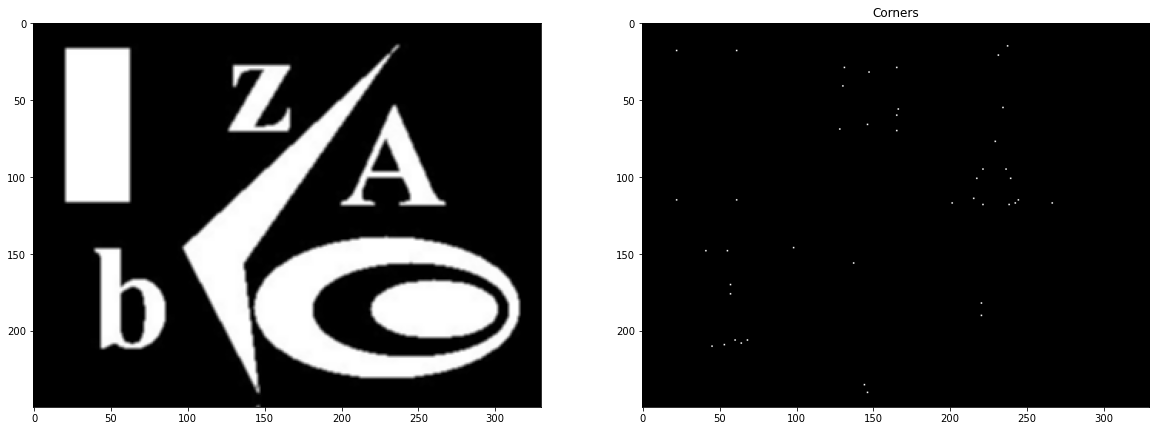

In [96]:
nms_img = image_process.nms_2d(min_eigenvalue_matrix, 17000)
plt.figure(figsize=(20,10))
plt.subplot(121)
utils.show_img(img)
plt.subplot(122)
utils.show_img(nms_img)
plt.title('Corners')

# 2 Harris Detector

In [69]:
alpha = 0.05
height = img.shape[0]
width = img.shape[1]
har = np.zeros((height, width))
for m in range(0, height):
    for n in range(0, width):
        har[m][n] = np.linalg.det(smm_map[m][n])-alpha*np.trace(smm_map[m][n])*np.trace(smm_map[m][n])

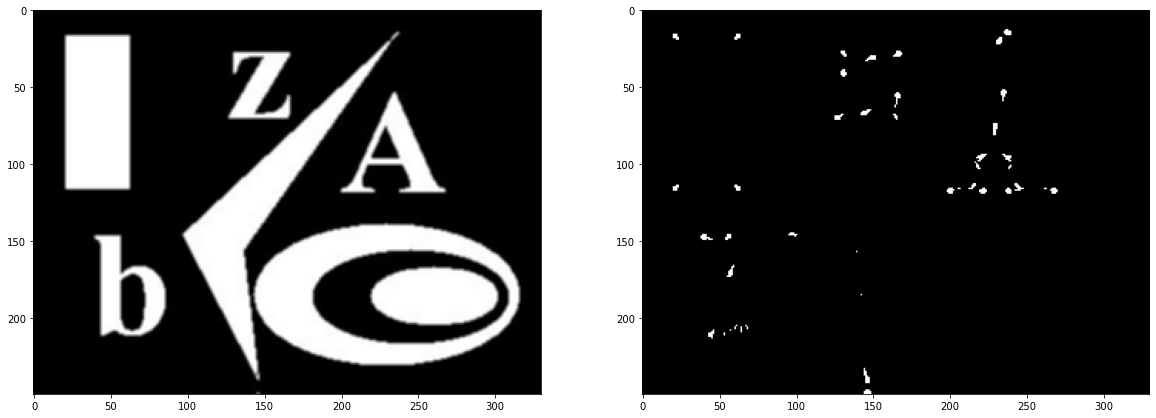

In [97]:
plt.figure(figsize=(20,10))
plt.subplot(121)
utils.show_img(img)
plt.subplot(122)
utils.show_img(image_process.thresholding_filter(har, 10000000))

Text(0.5, 1.0, 'Corners')

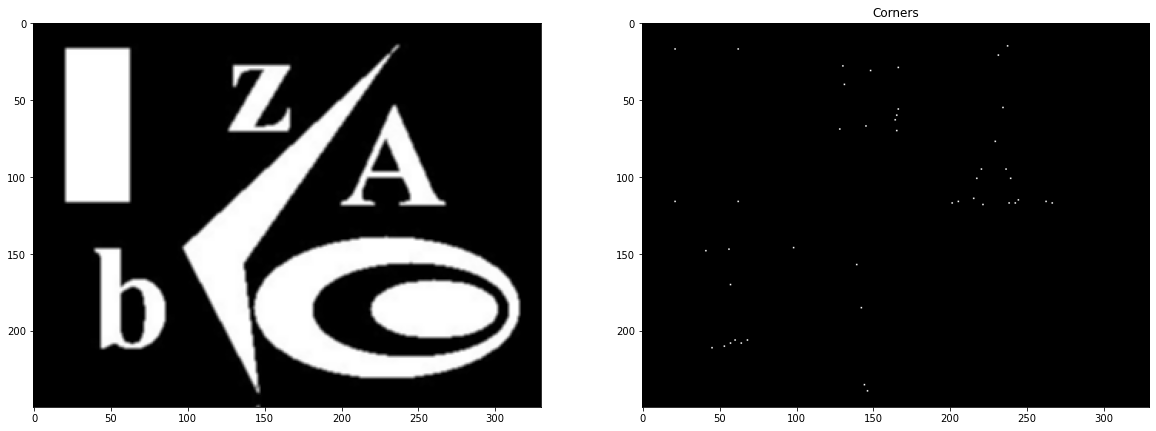

In [98]:
nms_img = image_process.nms_2d(har, 10000000)
plt.figure(figsize=(20,10))
plt.subplot(121)
utils.show_img(img)
plt.subplot(122)
utils.show_img(nms_img)
plt.title('Corners')